In [41]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
M=nx.read_gml("polblogs.gml", relabel=True)

In [43]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

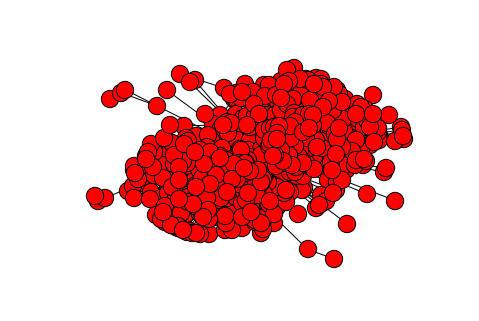

In [ ]:
nx.draw(G)

### 1.  Create a nice looking graph of the political blog network


In [ ]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=1000, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("political blog network", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [ ]:
centrality= nx.eigenvector_centrality_numpy(G)

In [ ]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [ ]:
sorted(blog_list, key=lambda x: x[1], reverse=True)

### 2.  What are the 10 most influential blogs?


In [29]:
sorted_blog_list_desc =sorted(blog_list, key=lambda x: x[1], reverse=True)
print "The 10 most influential blogs are:"
sorted_blog_list_desc[0:10]

The 10 most influential blogs are:


[(u'atrios.blogspot.com', 0.1946083600749793),
 (u'dailykos.com', 0.16085880865133675),
 (u'washingtonmonthly.com', 0.14572953582904338),
 (u'digbysblog.blogspot.com', 0.14165745601016677),
 (u'bodyandsoul.typepad.com', 0.14001258615025955),
 (u'liberaloasis.com', 0.13870430871243788),
 (u'tbogg.blogspot.com', 0.1369509001193572),
 (u'corrente.blogspot.com', 0.12866467087664815),
 (u'talkingpointsmemo.com', 0.12715536738447383),
 (u'dneiwert.blogspot.com', 0.12147092830075566)]

### 3.  What are the 10 least influential blogs?


In [30]:
sorted_blog_list_asc=sorted(blog_list, key=lambda x: x[1])
print "The 10 least influential blogs are:"
sorted_blog_list_asc[0:10]

The 10 least influential blogs are:


[(u'digital-democrat.blogspot.com', -1.0373600329210996e-18),
 (u'thelonedem.com', 5.012038987510902e-19),
 (u'americanworldview.tripod.com/weltansblog', 7.4387907899917515e-09),
 (u'quimundus.modblog.com', 6.704098662968629e-08),
 (u'batr.org/commentary.html', 6.766561471868259e-07),
 (u'batr.net', 6.767361565976408e-07),
 (u'democratvoice.org', 1.040626343022855e-06),
 (u'quimundus.squarespace.com', 6.098983141248072e-06),
 (u'massachusetts-liberal.com', 9.360725065424808e-06),
 (u'thingsasitis.net', 1.1599475002590804e-05)]

###4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

In [31]:
color_list=[]
GL=nx.Graph()
GR=nx.Graph()
node=M.nodes(data=True)
for i in range(0, M.number_of_nodes(), 1):
    if node[i][1]['value'] == 1:
        color_list.append('k')
        GR.add_node(node[i][0])
    else:
        color_list.append('b')
        GL.add_node(node[i][0])

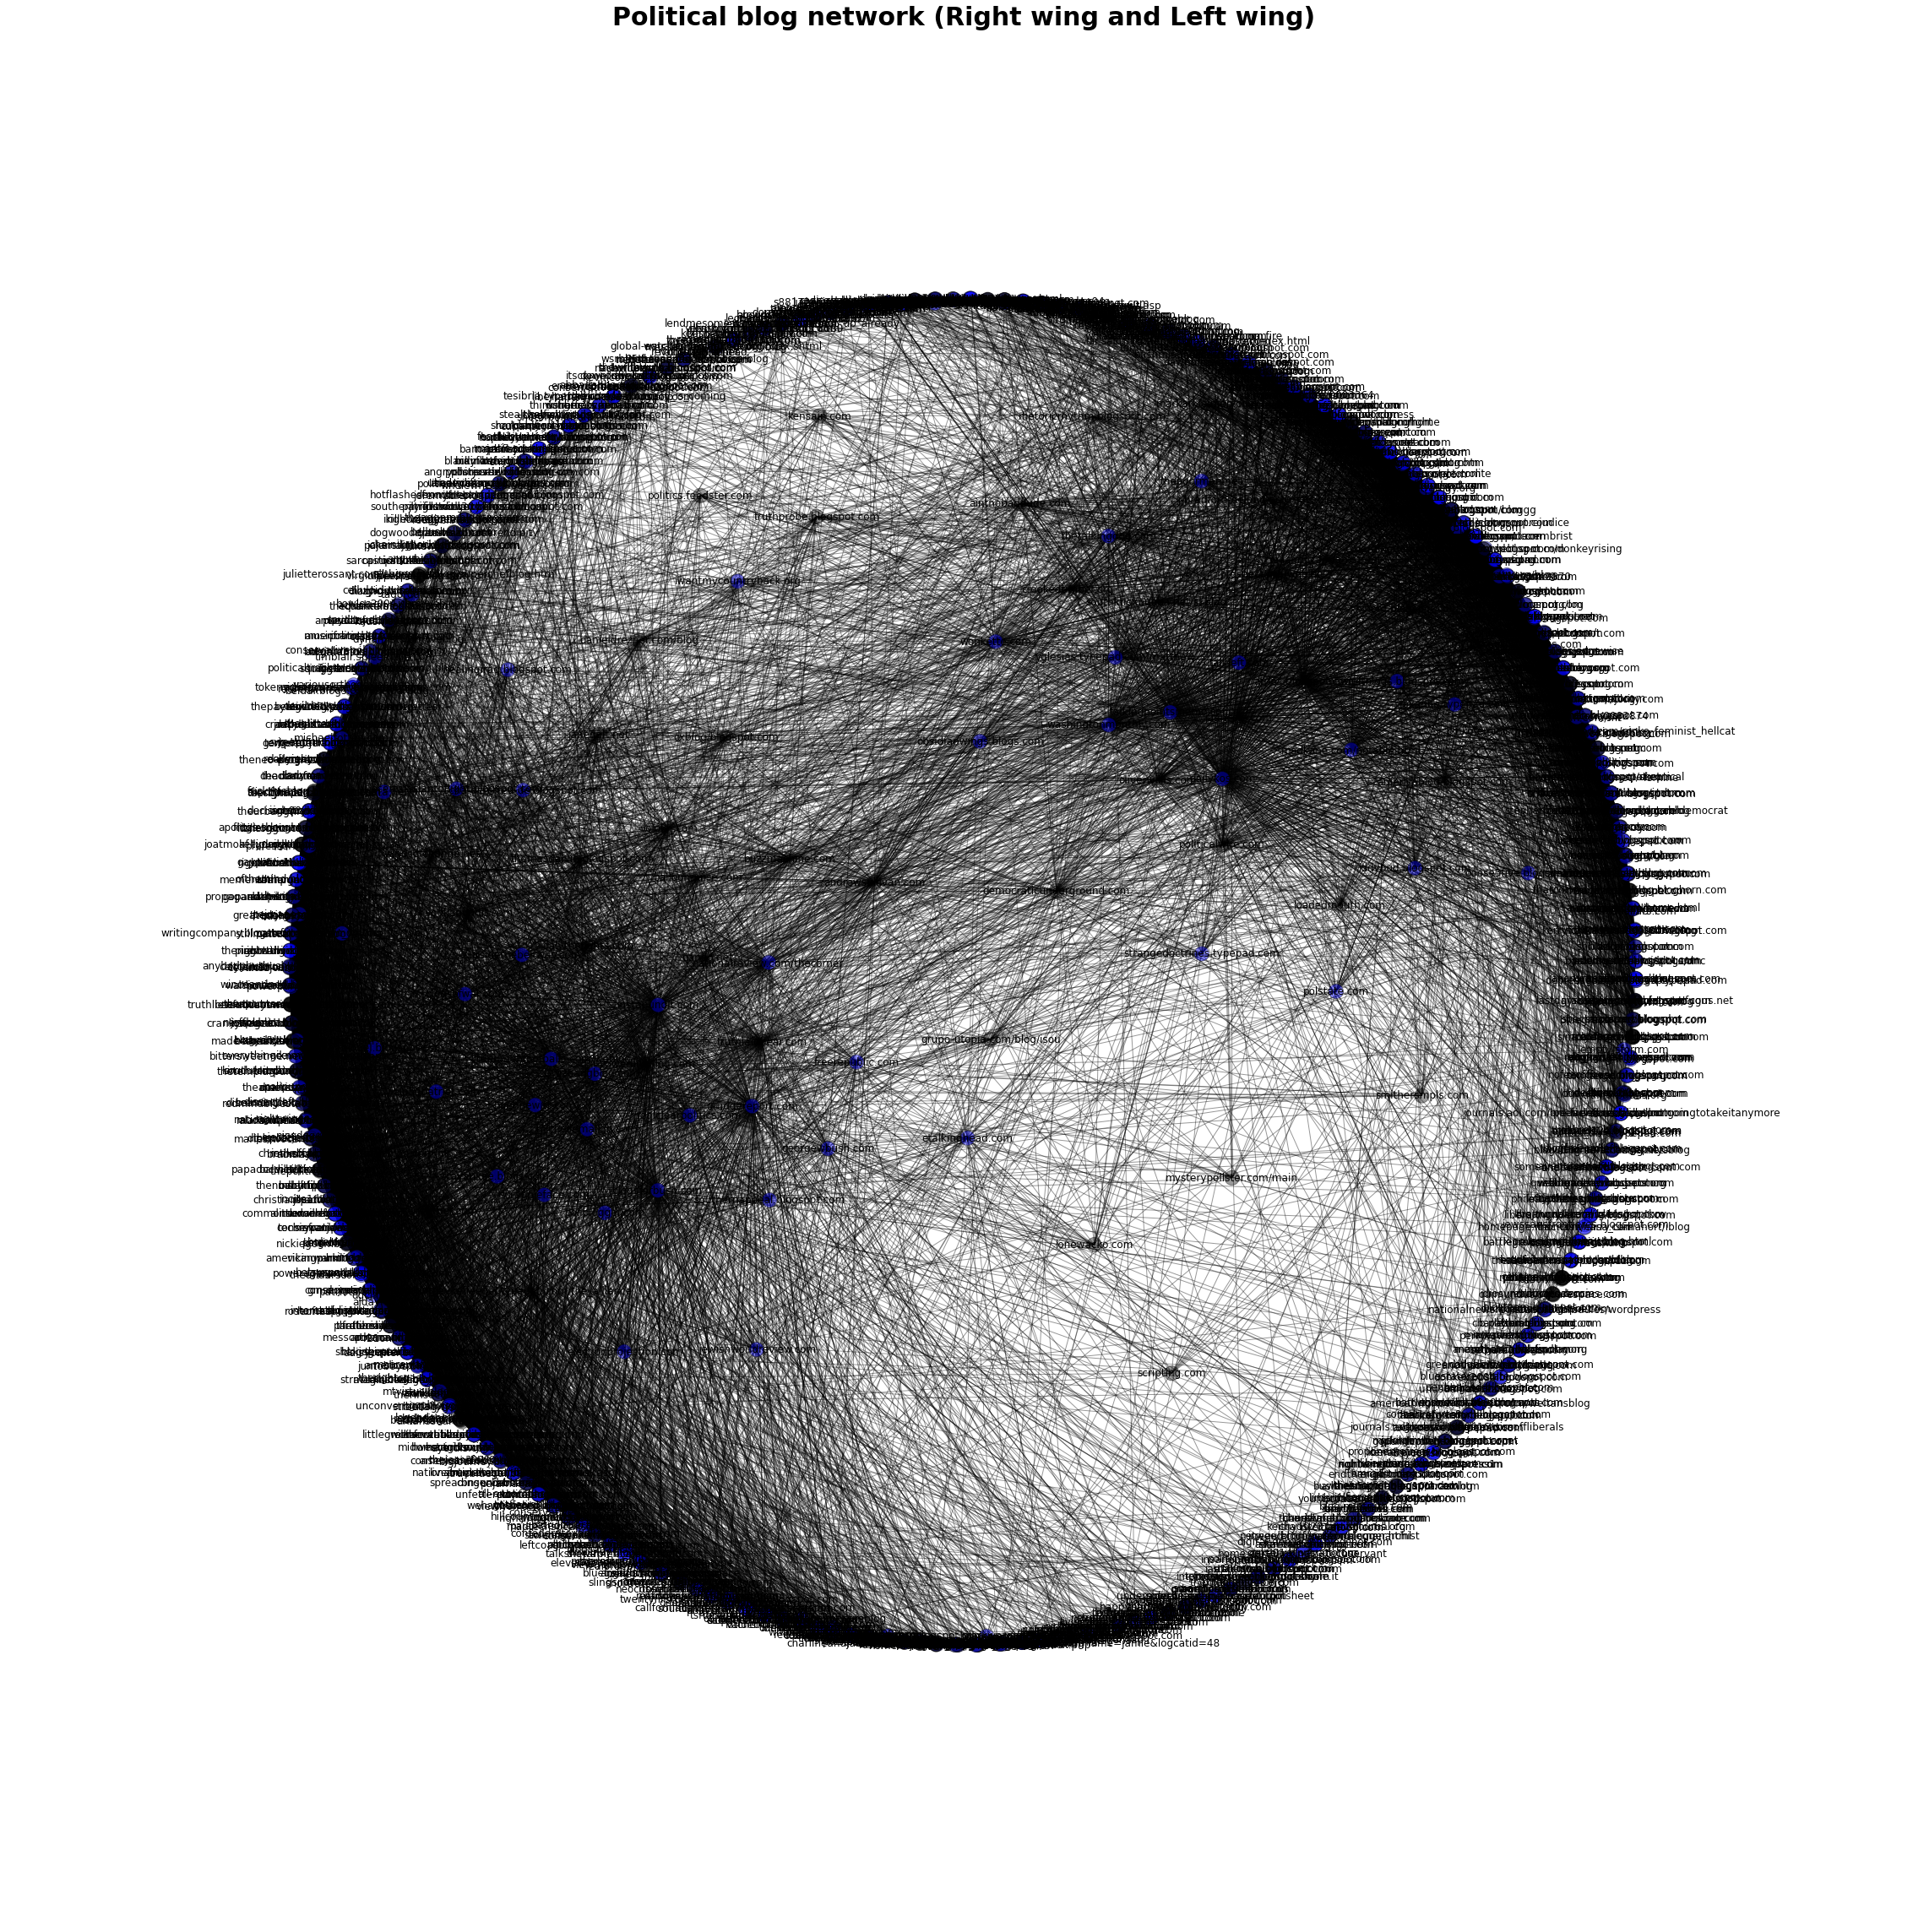

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network (Right wing and Left wing)", font)

nx.draw_networkx_nodes(G,pos,node_color=color_list,alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [33]:
for u,v,data in M.edges_iter(data=True):
    if GL.has_node(u) and GL.has_node(v) and GL.has_edge(u,v) :
        GL[u][v]['weight'] += 1
    elif GL.has_node(u) and GL.has_node(v):
        GL.add_edge(u, v, weight=1)
    else:
        continue

In [34]:
for u,v,data in M.edges_iter(data=True):
    if GR.has_node(u) and GR.has_node(v) and GR.has_edge(u,v) :
        GR[u][v]['weight'] += 1
    elif GR.has_node(u) and GR.has_node(v):
        GR.add_edge(u, v, weight=1)
    else:
        continue

In [35]:
centrality_L= nx.eigenvector_centrality_numpy(GL)
centrality_R= nx.eigenvector_centrality_numpy(GR)

In [36]:
def sorting(centrality):
    
    List = []
    for node in centrality:
        List.append((node,centrality[node]))
    sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
    sorted_list_asc=sorted(List, key=lambda x: x[1])
    return sorted_list_desc, sorted_list_asc

In [37]:
sorted_list_desc_L, sorted_list_asc_L = sorting(centrality_L)
print "The 10 most influential Left wing blogs are:"
sorted_list_desc_L[0:10]

The 10 most influential Left wing blogs are:


[(u'atrios.blogspot.com', 0.21014471148743766),
 (u'dailykos.com', 0.168887498022702),
 (u'bodyandsoul.typepad.com', 0.15620581384468224),
 (u'liberaloasis.com', 0.1558615747843117),
 (u'digbysblog.blogspot.com', 0.15491799802870013),
 (u'tbogg.blogspot.com', 0.15057628736016992),
 (u'corrente.blogspot.com', 0.14461524166958672),
 (u'washingtonmonthly.com', 0.13912545257202882),
 (u'dneiwert.blogspot.com', 0.13430191643368586),
 (u'pandagon.net', 0.1325415502896012)]

In [38]:
print "The 10 least influential Left wing blogs are:"
sorted_list_asc_L[0:10]

The 10 least influential Left wing blogs are:


[(u'steveguy.me.uk', -2.933089703137161e-18),
 (u'fidlet.com', -2.8138549259239377e-18),
 (u'home.earthlink.net/~heavy-duty', -2.6733205024755305e-18),
 (u'tuibguy.messagemonster.com', -2.427792716447433e-18),
 (u'liberationlearning.blogspot.com', -2.3575376415682098e-18),
 (u'uwaythinks.blogspot.com', -2.159281029043851e-18),
 (u'stonyfield.com/weblog/strongwomendailynews/index.html',
  -2.1388903473664302e-18),
 (u'dailyblurb.blogspot.com', -2.077969530638346e-18),
 (u'popstalin.com/news', -2.0233898570010138e-18),
 (u'nftl.blogspot.com', -1.8924309913000343e-18)]

In [39]:
sorted_list_desc_R, sorted_list_asc_R = sorting(centrality_R)
print "The 10 most influential Right wing blogs are:"
sorted_list_desc_R[0:10]

The 10 most influential Right wing blogs are:


[(u'instapundit.com', 0.21130462294596922),
 (u'blogsforbush.com', 0.2025949959259164),
 (u'hughhewitt.com', 0.16819176553481557),
 (u'lashawnbarber.com', 0.15892783854937367),
 (u'michellemalkin.com', 0.14770452828583153),
 (u'wizbangblog.com', 0.14672175943553026),
 (u'powerlineblog.com', 0.14614009491871857),
 (u'vodkapundit.com', 0.13718343720517884),
 (u'littlegreenfootballs.com/weblog', 0.1369999321722524),
 (u'outsidethebeltway.com', 0.12316955954206625)]

In [40]:
print "The 10 least influential Right wing blogs are:"
sorted_list_asc_R[0:10]

The 10 least influential Right wing blogs are:


[(u'hijkselur.blogspot.com', -1.1990720047158448e-17),
 (u'nakedrepublic.com', -1.1823390641155087e-17),
 (u'politicalhyperbole.blogspot.com', -1.1697742295413806e-17),
 (u'conpro.blogspot.com', -1.1419610506723205e-17),
 (u'skinmeister.name', -1.132338237931984e-17),
 (u'home.earthlink.net/~jasider', -1.1254584098766188e-17),
 (u'mc256.blogspot.com', -1.0667928589354679e-17),
 (u'wrighthot.com', -1.0409949351755485e-17),
 (u'cynscorion.com/v-web/b2/index.php', -1.0117111893560215e-17),
 (u'michaelsavagelistener.blog-city.com', -9.469263882493668e-18)]